### 1) How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.

#### Ans.
Let us consider two matrices $A$ and $B$ with sizes $(n, k)$ and $(k, m)$ respectively. The resulting matrix $C$ from the multiplication of $A$ and $B$ will have the size of $(n, m)$.

Each element of the matrix $C$ can be computed using
\begin{equation}
    C_{ij} = \sum_{l=1}^{k}  A_{il}\cdot B_{lj}
\end{equation}
where $1\leq i\leq n$ and $1\leq j\leq m$.
* No of multiplications:\
For each element $C_{ij}$, we need to perform $k$ multiplications. Since there are $n \times m$ elements in the matrix $C$, the total number of multiplications is :   $n\times m\times k$
* No of addidions:\
To sum $k$ products for each element of matrix $C$, we need to perform $k-1$ addidions. With $n\times m$ elements in $C$, the total number of addidions is : $n \times m \times (k-1) $

### 2) Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?

In [1]:
import time
import numpy as np
import random

# Function to multiply two matrices using list of lists
def matrix_multiply_list_of_lists(A, B):
    n, k, m = len(A), len(A[0]), len(B[0])
    
    C = [[0] * m for _ in range(n)]
    for i in range(n):
        for j in range(m):
            for l in range(k):
                C[i][j] += A[i][l]*B[l][j]
                
    return C

# Example matrices
A = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
B = [[9, 8],[7, 6], [5, 4]]

# Timing matrix multiplication using list of lists
start_time = time.time()
C_list = matrix_multiply_list_of_lists(A, B)
list_of_lists_time = time.time() - start_time
print("Result using list of lists:")

for row in C_list:
    print(row)
print(f"Time taken using list of lists: {list_of_lists_time:.7f} seconds")
print()

# Converting lists to numpy arrays
A_np = np.array(A)
B_np = np.array(B)

# Timing matrix multiplication using numpy
start_time = time.time()
C_np = np.matmul(A_np, B_np)
numpy_time = time.time() - start_time

print("Result using numpy:")
print(C_np)
print(f'Time taken using numpy: {numpy_time:.7f} seconds')

Result using list of lists:
[38, 32]
[101, 86]
[164, 140]
Time taken using list of lists: 0.0000420 seconds

Result using numpy:
[[ 38  32]
 [101  86]
 [164 140]]
Time taken using numpy: 0.0000522 seconds


Here, list of lists implimentation is faster compared to numpy.

### 3) Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against numpy.median routine in terms of time?

In [2]:
def median_sort(array):
    sorted_arr = sorted(array)
    n = len(sorted_arr)
    if n % 2 == 1:
        return sorted_arr[n // 2]
    else:
        return (sorted_arr[n // 2 - 1] + sorted_arr[n // 2]) / 2

# Generate a large random array
arr = np.random.randint(0, 1000000, size=1000).tolist()

# Timing using the sorting method
start_time = time.time()
median_sort_result = median_sort(arr)
sort_time = time.time() - start_time

# Timing using the numpy method
start_time = time.time()
median_numpy_result = np.median(arr)
numpy_time = time.time() - start_time

print("Median using sort:", median_sort_result)
print(f"Time taken using sort: {sort_time:.6f} seconds \n")

print("Median using numpy:", median_numpy_result)
print(f"Time taken using numpy: {numpy_time:.6f} seconds")

Median using sort: 506111.0
Time taken using sort: 0.000124 seconds 

Median using numpy: 506111.0
Time taken using numpy: 0.000299 seconds


In [3]:
def find_kth_largest(arr, k):
    n = len(arr)
    for i in range(k):
        max_val = float('-inf')
        max_index = -1
        for j in range(n):
            if arr[j] > max_val:
                max_val = arr[j]
                max_index = j
        
        arr[max_index] = -10
    return max_val

def find_median(arr):
    n = len(arr)
    if n % 2 == 1:
        # If n is odd, find the middle element
        return find_kth_largest(arr.copy(), n // 2 + 1)
    else:
        # If n is even, find the average of the two middle elements
        first = find_kth_largest(arr.copy(), n // 2)
        second = find_kth_largest(arr.copy(), n // 2 + 1)
        return (first + second) / 2

start_time = time.time()   
median = find_median(arr)
time_0 = time.time() - start_time
print("The median is:", median)
print(f"Time taken: {time_0:.6f} seconds")

The median is: 506111.0
Time taken: 0.040478 seconds


### 4) What is the gradient of the following function with respect to $x$ and $y$?

\begin{equation}
    x^2 y + y^3 \sin{x}
\end{equation}

In [4]:
def f(x, y):
    return x**2 * y + y**3 * np.sin(x)

def numerical_gradient(f, x, y, h=1e-8):
    '''Function to compute the gradient using finite differences'''
    df_dx = (f(x + h, y) - f(x - h, y)) / (2 * h)
    df_dy = (f(x, y + h) - f(x, y - h)) / (2 * h)
    return df_dx, df_dy

# Define the point at which to evaluate the gradient
x_val = np.random.uniform(-10, 10, 3)
y_val = np.random.uniform(-10, 10, 3)

# Compute the gradient at the given point
numerical_grad_x, numerical_grad_y = numerical_gradient(f, x_val, y_val)

print('Random x values:', x_val)
print('Random y values:', y_val)
print("Numerical gradient with respect to x:", numerical_grad_x)
print("Numerical gradient with respect to y:", numerical_grad_y)

Random x values: [-4.77883668  4.15513848 -1.05660764]
Random y values: [ 3.28141698 -5.85082191  0.7376737 ]
Numerical gradient with respect to x: [-29.01662199  57.30024455  -1.36143625]
Numerical gradient with respect to y: [ 55.06908423 -69.89449091  -0.30497412]


### 5) Use JAX to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y

In [5]:
import jax.numpy as jnp
from jax import grad

def gradient_jax(x, y):
    f_jax = lambda x, y: x**2 * y + y**3 * jnp.sin(x)
    df_dx = grad(lambda x: f_jax(x, y))(x)
    df_dy = grad(lambda y: f_jax(x, y))(y)
    return df_dx, df_dy

print('Random x values:', x_val)
print('Random y values:', y_val)


df_dx =  np.zeros(len(x_val))
df_dy = np.zeros(len(x_val))
for i in range(len(x_val)):
    df_dx[i]= gradient_jax(x_val[i], y_val[i])[0]
    df_dy[i]= gradient_jax(x_val[i], y_val[i])[1]
    
print('Analytical gradient using jax:')
print('df/dx = ', df_dx)
print('df/dy = ', df_dy)

print()
# Check the closeness of the results
print("Difference in df/dx:", np.abs(df_dx - numerical_grad_x))
print("Difference in df/dy:", np.abs(df_dy - numerical_grad_y))

Random x values: [-4.77883668  4.15513848 -1.05660764]
Random y values: [ 3.28141698 -5.85082191  0.7376737 ]
Analytical gradient using jax:
df/dx =  [-29.01662064  57.30025101  -1.36143625]
df/dy =  [ 55.06908035 -69.8944931   -0.3049742 ]

Difference in df/dx: [1.35807386e-06 6.45788350e-06 2.02145856e-09]
Difference in df/dy: [3.87325053e-06 2.19691901e-06 7.73842785e-08]


### 6) Use sympy to confirm that you obtain the same gradient analytically.

In [6]:
import sympy as sp

# Define the symbols
x, y = sp.symbols('x y')

# Define the function
f = x**2 * y + y**3 * sp.sin(x)

# Compute the partial derivatives
f_x = sp.diff(f, x)  # Partial derivative with respect to x
f_y = sp.diff(f, y)  # Partial derivative with respect to y

# Display the partial derivatives
print("Analytical gradient with respect to x:", f_x)

print("Analytical gradient with respect to y:", f_y)

# Substitute the values into the partial derivatives
grad_x_vals = np.array([f_x.subs({x: float(val_x), y: float(val_y)}) for val_x, val_y in zip(x_val, y_val)])
grad_y_vals = np.array([f_y.subs({x: float(val_x), y: float(val_y)}) for val_x, val_y in zip(x_val, y_val)])

print('Random x values:', x_val)
print('Random y values:', y_val)
print(f"Gradients at points:")
print("df/dx =", grad_x_vals)
print("df/dy =", grad_y_vals)

Analytical gradient with respect to x: 2*x*y + y**3*cos(x)
Analytical gradient with respect to y: x**2 + 3*y**2*sin(x)
Random x values: [-4.77883668  4.15513848 -1.05660764]
Random y values: [ 3.28141698 -5.85082191  0.7376737 ]
Gradients at points:
df/dx = [-29.0166220847442 57.3002463334633 -1.36143625747247]
df/dy = [55.0690845659184 -69.8944910367464 -0.304974119992013]


### 7) Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks.

In [7]:
students_records = {
    2022: {
        "Branch 1": [
            {
                "Roll Number": 1,
                "Name": "N",
                "Marks": {
                    "Maths": 100,
                    "English": 70
                    
                }
            }
            
        ],
        "Branch 2": [
            
        ]
    },
    2023: {
        "Branch 1": [
            # Add students in Branch 1 for 2023
        ],
        "Branch 2": [
            {
                "Roll Number": 1,
                "Name": "N",
                "Marks": {
                    "Maths": 90,
                    "English": 70
                    
                }
            }
        ]
    },
    2024: {
        "Branch 1": [
            # Add students in Branch 1 for 2024
        ],
        "Branch 2": [
            # Add students in Branch 2 for 2024
        ]
    },
    2025: {
        "Branch 1": [
            # Add students in Branch 1 for 2025
        ],
        "Branch 2": [
            # Add students in Branch 2 for 2025
        ]
    }
}

print(students_records[2023]["Branch 2"][0]["Marks"]["Maths"]) 


90


### 8) Store the same information using Python classes. We have an overall database which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects.

In [16]:
class Student:
    def __init__(self, roll_number, name, marks):
        self.roll_number = roll_number
        self.name = name
        self.marks = marks

    def __repr__(self):
        return f"Student(Roll Number: {self.roll_number}, Name: {self.name}, Marks: {self.marks})"


class Branch:
    def __init__(self, name):
        self.name = name
        self.students = []

    def add_student(self, student):
        self.students.append(student)

    def __repr__(self):
        return f"Branch(Name: {self.name}, Students: {self.students})"


class Year:
    def __init__(self, year):
        self.year = year
        self.branches = []

    def add_branch(self, branch):
        self.branches.append(branch)

    def __repr__(self):
        return f"Year(Year: {self.year}, Branches: {self.branches})"


### 9)

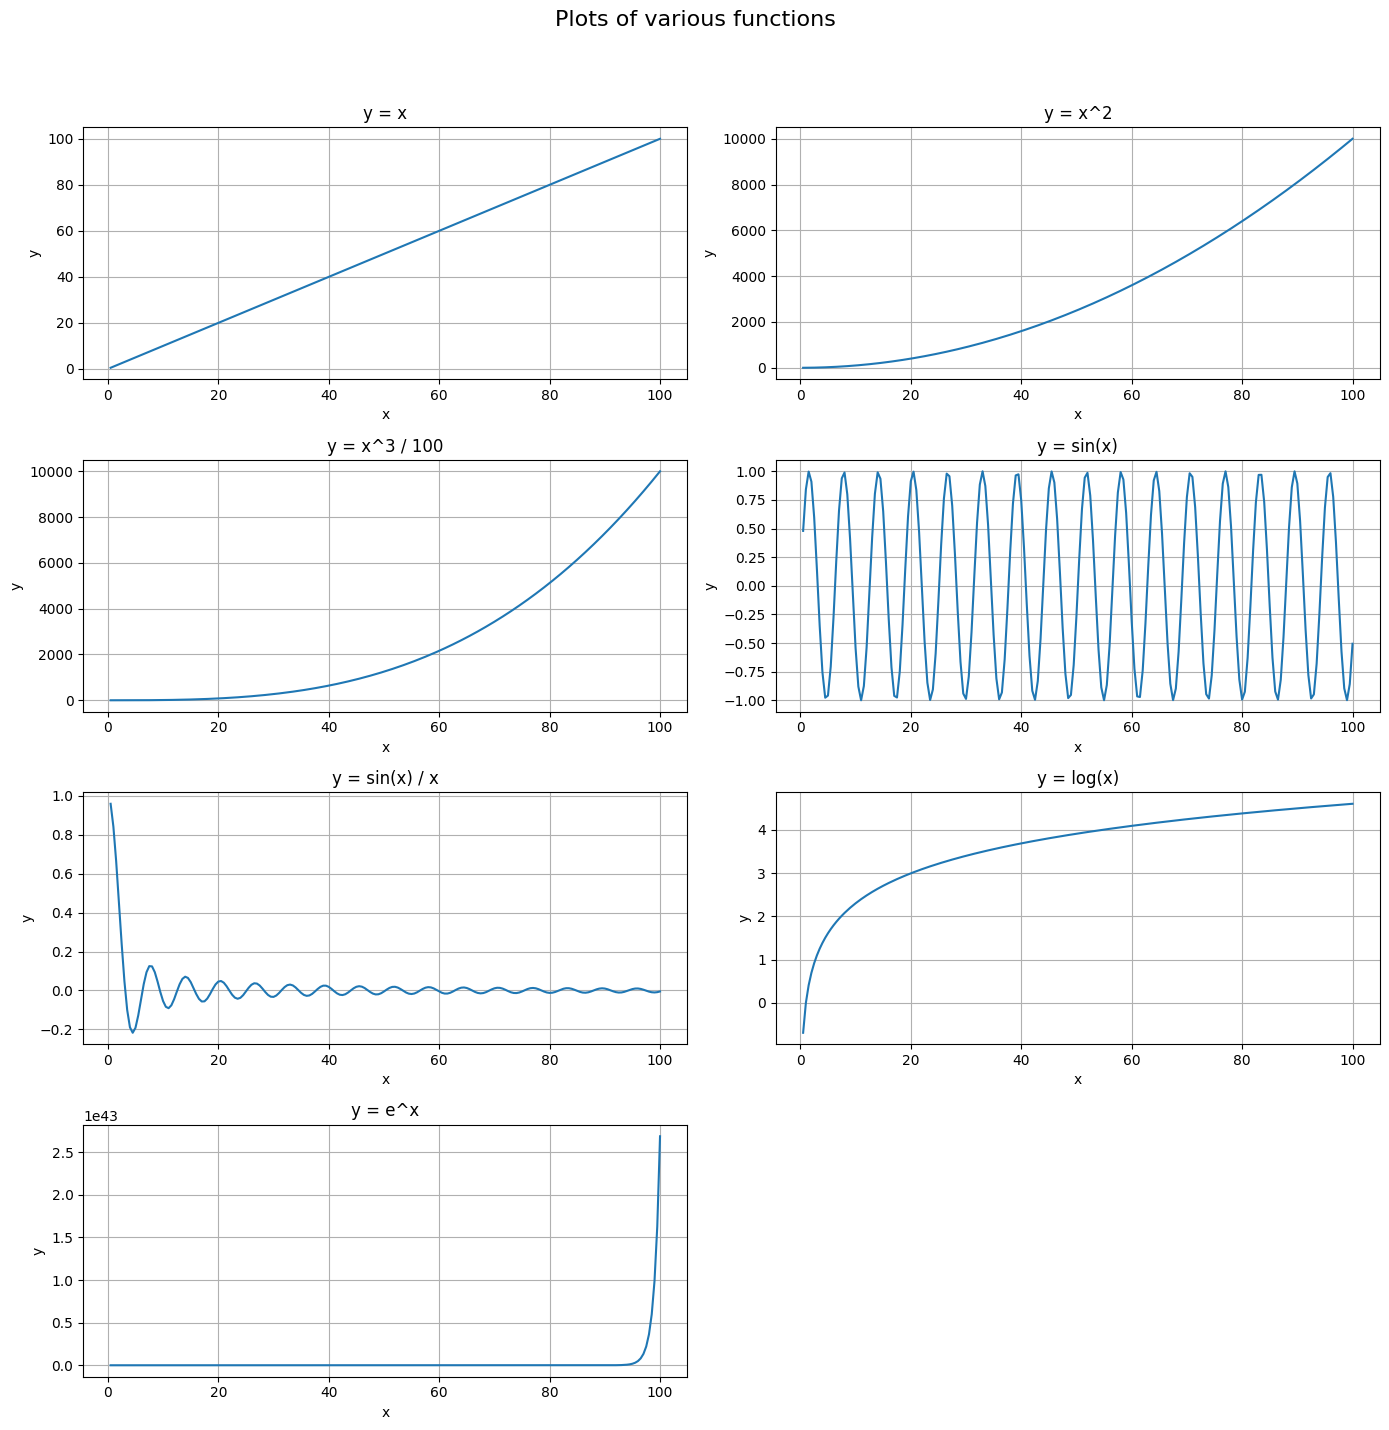

In [10]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0.5, 100.5, 0.5)

# Define the functions
y1 = x
y2 = x**2
y3 = x**3 / 100
y4 = np.sin(x)
y5 = np.sin(x) / x
y6 = np.log(x)
y7 = np.exp(x)

# Create subplots
fig, axs = plt.subplots(4, 2, figsize=(14, 15))

axs[0, 0].plot(x, y1)
axs[0, 0].set_title('y = x')
axs[0, 0].grid(True)

axs[0, 1].plot(x, y2)
axs[0, 1].set_title('y = x^2')
axs[0, 1].grid(True)

axs[1, 0].plot(x, y3)
axs[1, 0].set_title('y = x^3 / 100')
axs[1, 0].grid(True)

axs[1, 1].plot(x, y4)
axs[1, 1].set_title('y = sin(x)')
axs[1, 1].grid(True)

axs[2, 0].plot(x, y5)
axs[2, 0].set_title('y = sin(x) / x')
axs[2, 0].grid(True)

axs[2, 1].plot(x, y6)
axs[2, 1].set_title('y = log(x)')
axs[2, 1].grid(True)

axs[3, 0].plot(x, y7)
axs[3, 0].set_title('y = e^x')
axs[3, 0].grid(True)

fig.delaxes(axs[3, 1])

fig.suptitle('Plots of various functions', fontsize=16)
for ax in axs.flat:
    ax.set(xlabel='x', ylabel='y')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

### 10) Using numpy generate a matrix of size 20X5 containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.

In [11]:
import numpy as np
import pandas as pd

# Generate a 20x5 matrix with random numbers uniformly drawn from 1 to 2
matrix = np.random.uniform(1, 2, (20, 5))

# Create a dataframe from the matrix
df = pd.DataFrame(matrix, columns=["a", "b", "c", "d", "e"])

# Find the column with the highest standard deviation
highest_std_column = df.std().idxmax()

# Find the row with the lowest mean
lowest_mean_row = df.mean(axis=1).idxmin()

print(f"Column with the highest standard deviation: {highest_std_column}")
print(f"Row with the lowest mean: {lowest_mean_row}")


print("\nDataFrame:")
print(df)
print("\nStandard Deviations:")
print(df.std())
print("\nMeans of Rows:")
print(df.mean(axis=1))


Column with the highest standard deviation: c
Row with the lowest mean: 13

DataFrame:
           a         b         c         d         e
0   1.447771  1.974111  1.124243  1.752351  1.893629
1   1.008402  1.635924  1.543506  1.357330  1.381450
2   1.925243  1.576474  1.119735  1.480215  1.023570
3   1.442040  1.944680  1.152418  1.206591  1.767708
4   1.526167  1.373779  1.495029  1.222251  1.265322
5   1.870734  1.039113  1.530766  1.302738  1.661564
6   1.447617  1.180813  1.217596  1.852734  1.635520
7   1.181111  1.967949  1.197296  1.162455  1.464096
8   1.387710  1.249936  1.548110  1.439855  1.375665
9   1.926598  1.345775  1.892067  1.130435  1.317376
10  1.387300  1.351405  1.959494  1.202621  1.846727
11  1.065152  1.980969  1.776743  1.929326  1.226420
12  1.464985  1.182257  1.912777  1.158250  1.597238
13  1.354717  1.046545  1.059959  1.223946  1.573836
14  1.547471  1.780993  1.351657  1.356917  1.312742
15  1.548641  1.831909  1.798932  1.280216  1.156805
16  1.145769

### Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.

In [12]:
import numpy as np
import pandas as pd

# Add a new column 'f' which is the sum of columns 'a', 'b', 'c', 'd', 'e'
df["f"] = df["a"] + df["b"] + df["c"] + df["d"] + df["e"]

# Add a new column 'g' based on the value of column 'f'
df["g"] = np.where(df["f"] < 8, "LT8", "GT8")

# Find the number of rows where the value in the column 'g' is 'LT8'
num_lt8 = df[df["g"] == "LT8"].shape[0]

# Find the standard deviation of the column 'f' for rows where 'g' is 'LT8' and 'GT8' respectively
std_f_lt8 = df[df["g"] == "LT8"]["f"].std()
std_f_gt8 = df[df["g"] == "GT8"]["f"].std()

print(f"Number of rows where 'g' is 'LT8': {num_lt8}")
print(f"Standard deviation of 'f' for rows where 'g' is 'LT8': {std_f_lt8}")
print(f"Standard deviation of 'f' for rows where 'g' is 'GT8': {std_f_gt8}")

print("\nDataFrame:")
print(df)


Number of rows where 'g' is 'LT8': 17
Standard deviation of 'f' for rows where 'g' is 'LT8': 0.4279421173608378
Standard deviation of 'f' for rows where 'g' is 'GT8': 0.448870361800978

DataFrame:
           a         b         c         d         e         f    g
0   1.447771  1.974111  1.124243  1.752351  1.893629  8.192104  GT8
1   1.008402  1.635924  1.543506  1.357330  1.381450  6.926611  LT8
2   1.925243  1.576474  1.119735  1.480215  1.023570  7.125238  LT8
3   1.442040  1.944680  1.152418  1.206591  1.767708  7.513436  LT8
4   1.526167  1.373779  1.495029  1.222251  1.265322  6.882548  LT8
5   1.870734  1.039113  1.530766  1.302738  1.661564  7.404914  LT8
6   1.447617  1.180813  1.217596  1.852734  1.635520  7.334280  LT8
7   1.181111  1.967949  1.197296  1.162455  1.464096  6.972907  LT8
8   1.387710  1.249936  1.548110  1.439855  1.375665  7.001277  LT8
9   1.926598  1.345775  1.892067  1.130435  1.317376  7.612251  LT8
10  1.387300  1.351405  1.959494  1.202621  1.846727  7

### 12) Write a small piece of code to explain broadcasting in numpy.

Broadcasting in numpy allows operations on arrays of different shapes. It enables element-wise operations without explicitly replicating data which makes the computations more efficient.

In [13]:
import numpy as np

# Create a 1D array with shape (3,)
a = np.array([1, 2, 3])

# Create a 2D array with shape (3,1)
b = np.array([[10],
              [20],
              [30]])

# Performing an operation using broadcasting
result = a + b

print("Array a:")
print(a)

print("\nArray b:")
print(b)

print("\nResult of a + b with broadcasting:")
print(result)

Array a:
[1 2 3]

Array b:
[[10]
 [20]
 [30]]

Result of a + b with broadcasting:
[[11 12 13]
 [21 22 23]
 [31 32 33]]


### 13) Write a function to compute the argmin of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the np.argmin function to verify your solution.

When we add a and b, numpy automatically expands a to match the shape of b. This operation results in a new array with shape (3, 3).

In [14]:
def custom_argmin(arr):
    # Initialize the minimum value and the index of the minimum value
    min_index = 0
    min_value = arr[0]
    
    for i in range(1, len(arr)):
        if arr[i] < min_value:
            min_value = arr[i]
            min_index = i
    
    return min_index

# Test the function with a sample array
arr = np.array([3, 1, 4, 1, 5, 9, 2, 6, 5])

# Computing argmin using the custom function
custom_min_index = custom_argmin(arr)

# Computing argmin using np.argmin 
numpy_min_index = np.argmin(arr)

print("Custom argmin index:", custom_min_index)
print("Numpy argmin index:", numpy_min_index)

Custom argmin index: 1
Numpy argmin index: 1


Here we see that the custom function's result matches np.argmin